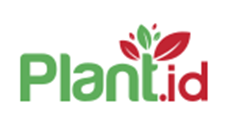

官方網站 : https://plant.id/

提供的服務:

1. 植物類型分類
2. 植物病害(可檢測 90 種不同的疾病)

特色:
1. 可以同時識別多種植物
2. 回傳相似植物的照片
3. 識別精準度較高(90%)

限制:
1. 每日限流 100
2. 每月10種植物

In [12]:
import base64
import requests
import json
from PIL import Image
from io import BytesIO

## 圖源



In [14]:
# 1. Epipremnum aureum 黃金葛
# 2. 虎尾蘭
# 3. Tillandsia 空氣鳳梨
images = ['https://foliageandme.com/wp-content/uploads/Pothos-Icon.jpg',
      'https://www.picturethisai.com/wiki-image/1080/153936867790684172.jpeg',
      'https://shoplineimg.com/6295e0f2d7d1ac0032a2a3fc/62bfb0670cadeb001e686931/800x.jpg'
      ]
# 三種植物圖，使用requests取content(binary)，儲存至一個List
images_raw = []
for image_url in images :
    response = requests.get(image_url, stream=True).content
    images_raw.append(response)
print(f'Number of images {len(images_raw)}')

Number of images 3


### 預覽目標圖片

In [15]:
def plot_image(image):
  size = 128, 128
  im = Image.open(image)
  im.thumbnail(size, Image.Resampling.LANCZOS)
  display(im)

黃金葛

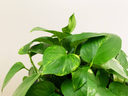

In [16]:
image = BytesIO(images_raw[0])
plot_image(image)

虎尾蘭

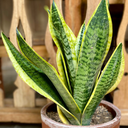

In [17]:
image = BytesIO(images_raw[1])
plot_image(image)

空氣鳳梨

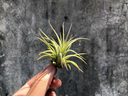

In [18]:
image = BytesIO(images_raw[2])
plot_image(image)

## API Setting

In [19]:
# API v2
url = "https://plant.id/api/v3/identification"

# base64 encode function
def encode_file(file_name):
    return base64.b64encode(file_name).decode("ascii")

# 輸入圖片，進行識別。
# 回傳為一個 HTTP Response
def identify_plant(file_names):

    payload = json.dumps({
      "images":  [encode_file(img) for img in file_names],
      "latitude": 49.1951239,
      "longitude": 16.6077111,
      "similar_images": True,
    })
    headers = {
        "Content-Type": "application/json",
        "Api-Key": # Set you API_KEY here,
        }

    response = requests.request("POST", url, headers=headers, data=payload)

    return response


### 取得辨識結果

In [20]:
response = identify_plant(images_raw)

### 結果轉成 json 方便後續操作

In [21]:
json_object = json.loads(response.text)

json_formatted_str = json.dumps(json_object, indent=2)

print(json_formatted_str)

{
  "access_token": "1ab1WPMY1kC4eHC",
  "model_version": "plant_id:3.6.0",
  "custom_id": null,
  "input": {
    "latitude": 49.1951239,
    "longitude": 16.6077111,
    "similar_images": true,
    "images": [
      "https://plant.id/media/imgs/aad1c0a7c251452b9cc25e1300259639.jpg",
      "https://plant.id/media/imgs/a5617d176692418f929f4ee28ebf371c.jpg",
      "https://plant.id/media/imgs/1553588976d343c8a8b74b65427a7665.jpg"
    ],
    "datetime": "2024-03-13T03:06:17.186171+00:00"
  },
  "result": {
    "classification": {
      "suggestions": [
        {
          "id": "561c4843a9e50129",
          "name": "Tillandsia ionantha",
          "probability": 0.3329,
          "similar_images": [
            {
              "id": "21798f954b5d6c957be68ad632cb6ebe31206635",
              "url": "https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/217/98f954b5d6c957be68ad632cb6ebe31206635.jpeg",
              "license_name": "CC BY-SA 4.0",
              "license_url": "htt

### 呈現結果

In [22]:
def plot_image_url(image_url):
  size = 128, 128
  im = Image.open(requests.get(image_url, stream=True).raw)
  im.thumbnail(size, Image.Resampling.LANCZOS)
  display(im)

{'id': '561c4843a9e50129', 'name': 'Tillandsia ionantha', 'probability': 0.3329, 'similar_images': [{'id': '21798f954b5d6c957be68ad632cb6ebe31206635', 'url': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/217/98f954b5d6c957be68ad632cb6ebe31206635.jpeg', 'license_name': 'CC BY-SA 4.0', 'license_url': 'https://creativecommons.org/licenses/by-sa/4.0/', 'citation': 'Heather McIntyre', 'similarity': 0.719, 'url_small': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/217/98f954b5d6c957be68ad632cb6ebe31206635.small.jpeg'}, {'id': '9373fb491b618356fbf4911efbcc86ffbedf32f0', 'url': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/937/3fb491b618356fbf4911efbcc86ffbedf32f0.jpeg', 'similarity': 0.697, 'url_small': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/937/3fb491b618356fbf4911efbcc86ffbedf32f0.small.jpeg'}], 'details': {'language': 'en', 'entity_id': '561c4843a9e50129'}}
Tillandsia ionantha
0.3329


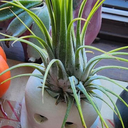

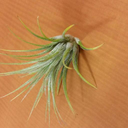

----------------------------------------------------------------------------------------------------
{'id': 'f12b23ca000d0506', 'name': 'Epipremnum aureum', 'probability': 0.3328, 'similar_images': [{'id': '530a965b54cc30659f77572dc5b44ffc43e1bb29', 'url': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/530/a965b54cc30659f77572dc5b44ffc43e1bb29.jpeg', 'similarity': 0.824, 'url_small': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/530/a965b54cc30659f77572dc5b44ffc43e1bb29.small.jpeg'}, {'id': '1f5190834e44eb30a4b863ac059881f88f48ce4c', 'url': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/1f5/190834e44eb30a4b863ac059881f88f48ce4c.jpeg', 'similarity': 0.82, 'url_small': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/1f5/190834e44eb30a4b863ac059881f88f48ce4c.small.jpeg'}], 'details': {'language': 'en', 'entity_id': 'f12b23ca000d0506'}}
Epipremnum aureum
0.3328


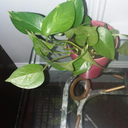

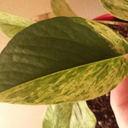

----------------------------------------------------------------------------------------------------
{'id': 'fb1f0f0b31562030', 'name': 'Dracaena trifasciata', 'probability': 0.3312, 'similar_images': [{'id': '9a51c53c8728c262639c81381abc1869f2e19201', 'url': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/9a5/1c53c8728c262639c81381abc1869f2e19201.jpeg', 'similarity': 0.75, 'url_small': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/9a5/1c53c8728c262639c81381abc1869f2e19201.small.jpeg'}, {'id': '844eaeba78729e51e6d96ec0ccf481d04b4683ca', 'url': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/844/eaeba78729e51e6d96ec0ccf481d04b4683ca.jpeg', 'similarity': 0.74, 'url_small': 'https://plant-id.ams3.cdn.digitaloceanspaces.com/similar_images/3/844/eaeba78729e51e6d96ec0ccf481d04b4683ca.small.jpeg'}], 'details': {'language': 'en', 'entity_id': 'fb1f0f0b31562030'}}
Dracaena trifasciata
0.3312


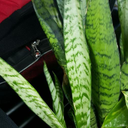

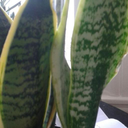

----------------------------------------------------------------------------------------------------


In [24]:
for idx,d in enumerate(json_object['result']['classification']['suggestions']):

    print(d)
    print(d['name'])
    print(d['probability'])

    for image in d['similar_images']:
        image_url = image['url']
        plot_image_url(image_url = image_url)
    print('-'*100)